In [2]:
#Dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from pycaret.nlp import *
from pycaret.classification import *

from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df = pd.read_csv('Kindle_Reviews_Short.csv')

In [4]:
pd.set_option('display.max_rows', 1000)

In [5]:
df

,Unnamed: 0,overall,reviewerID,asin,reviewText,summary,vote,newReviewTime
0,0,3,A2NPZW0MXZVKPZ,B000FC2S2Q,The movie version of this book is one of my fa...,Not near as good as the movie,2,2016-06-26
1,1,5,A2JSR55IWC7HWO,B000HC48T0,"I enjoy reading this newspaper! It is real, fa...",Five Stars,7,2017-05-04
2,2,4,AR4N9QJ67IG2I,B000JMKQKS,This was very easy to read because it's writte...,Easy to read,2,2016-11-24
3,3,2,A1P00M7SDR84JY,B000JMKQKS,When I found how much I gained form the Jason ...,not as much helpful information as i had hoped...,8,2016-10-06
4,4,5,A3RZKVJ1L7XO6G,B000JMKQKS,Great book. Very informative. Would recommen...,Great book. Very informative and understandable.,2,2016-05-11
...,...,...,...,...,...,...,...,...
35543,35543,5,A3SPOW1SFOBMU8,B01HIXVV1S,Blue Lady's Sweet Dreams.\n\nI adore the main ...,Wonderful Sequel,3,2016-08-11
35544,35544,5,A24314ZRNRP70B,B01HJ7ZMP4,This story weaves elements of reincarnation wi...,A Great Adventure Story,2,2016-07-12
35545,35545,5,A328S9RN3U5M68,B01HJ7ZMP4,Australian author Liz D. Marx received her deg...,"He forbade me, Kaye. Ill never be able to do m...",2,2016-07-11
35546,35546,3,A1T5S313UMCLPZ,B01HJ7ZMCC,I liked how developed the characters and the d...,Good read,6,2016-08-03


In [6]:
df.rename(columns={'overall':'actual_ratings'},inplace=True)

In [7]:
df.drop(['Unnamed: 0','asin','vote','newReviewTime'], axis=1, inplace=True)

In [8]:
df.drop(['reviewerID'], axis=1, inplace=True)

In [9]:
# df['reviewText']

In [10]:
df

,actual_ratings,reviewText,summary
0,3,The movie version of this book is one of my fa...,Not near as good as the movie
1,5,"I enjoy reading this newspaper! It is real, fa...",Five Stars
2,4,This was very easy to read because it's writte...,Easy to read
3,2,When I found how much I gained form the Jason ...,not as much helpful information as i had hoped...
4,5,Great book. Very informative. Would recommen...,Great book. Very informative and understandable.
...,...,...,...
35543,5,Blue Lady's Sweet Dreams.\n\nI adore the main ...,Wonderful Sequel
35544,5,This story weaves elements of reincarnation wi...,A Great Adventure Story
35545,5,Australian author Liz D. Marx received her deg...,"He forbade me, Kaye. Ill never be able to do m..."
35546,3,I liked how developed the characters and the d...,Good read


In [11]:
#Convert a collection of text documents to a matrix of token counts.
#implements both tokenization and occurrence counting in a single class:

tf_vectorizer = CountVectorizer(max_features=800,stop_words={'english'}, ngram_range=(1,1))
#features = tf_vectorizer.fit_transform(df['reviewText'].apply(lambda features : np.str_(features)))
#features_df = pd.DataFrame(features.toarray(), columns=tf_vectorizer.get_feature_names())

#################################################


In [12]:
features = tf_vectorizer.fit_transform(df['reviewText'].apply(lambda features : np.str_(features)))

In [13]:
features_df = pd.DataFrame(features.toarray(), columns=tf_vectorizer.get_feature_names())
# 35 K rows started at 6:31 imme

In [14]:
print("Vocabulary: ", tf_vectorizer.vocabulary_)

Vocabulary:  {'the': 676, 'of': 478, 'this': 690, 'book': 71, 'is': 350, 'one': 488, 'my': 457, 'and': 28, 'have': 298, 'seen': 596, 'it': 353, 'at': 37, 'least': 381, 'or': 493, 'more': 448, 'times': 700, 'without': 770, 'however': 328, 'found': 253, 'rather': 544, 'boring': 73, 'when': 758, 'two': 724, 'seemed': 594, 'to': 702, 'begin': 56, 'in': 339, 'middle': 438, 'an': 27, 'plot': 522, 'worked': 778, 'way': 750, 'end': 185, 'which': 760, 'must': 456, 'was': 748, 'usually': 736, 'better': 64, 'than': 673, 'but': 87, 'case': 97, 'true': 713, 'if': 335, 'you': 796, 've': 737, 'don': 167, 'expect': 211, 'find': 240, 'any': 30, 'between': 65, 'really': 556, 'be': 48, 'little': 395, 'only': 490, 'thing': 684, 'instead': 343, 'disappointed': 161, 'enjoy': 189, 'reading': 550, 'real': 553, 'fact': 217, 'very': 738, 'easy': 178, 'read': 547, 'because': 51, 'written': 790, 'about': 2, 'level': 387, 'so': 624, 'll': 399, 'get': 266, 'same': 578, 'over': 499, 'again': 11, 'that': 675, 'for': 

In [15]:
features_df.head(5)

,10,able,about,absolutely,across,action,actually,add,adult,adventure,after,again,against,age,ago,all,almost,alone,along,alpha,already,also,although,always,am,amazing,amazon,an,and,another,any,anyone,anything,are,aren,around,as,at,attention,attraction,author,authors,away,awesome,baby,back,bad,based,be,beautiful,became,because,become,becomes,been,before,begin,beginning,begins,behind,being,believable,believe,best,better,between,beyond,big,bit,black,body,book,books,boring,both,bought,boy,boyfriend,break,bring,brings,broken,brother,brothers,brought,building,business,but,buy,by,call,called,came,can,cannot,cant,care,case,caught,certainly,chance,change,changed,chapter,chapters,character,characters,check,chemistry,child,children,class,clean,clear,cliffhanger,close,collection,college,come,comes,coming,complete,completely,complex,connection,continue,continues,control,copy,could,couldn,couple,course,cover,crazy,cute,danger,darcy,dark,daughter,day,days,de,dead,deal,death,decided,deep,definitely,depth,description,despite,detail,details,developed,development,dialogue,did,didn,different,difficult,disappointed,do,does,doesn,doesnt,doing,don,done,down,drama,drawn,due,during,each,early,earth,easily,easy,editing,either,elizabeth,else,emotional,emotions,end,ended,ending,ends,enjoy,enjoyable,enjoyed,enough,entertaining,entire,errors,especially,etc,even,events,ever,every,everyone,everything,evil,ex,exactly,excellent,except,exchange,exciting,expect,expected,experience,extremely,eyes,face,fact,fall,family,fan,fantastic,fantasy,far,fast,father,favorite,feel,feeling,feelings,feels,fell,felt,female,few,fiction,fight,figure,filled,finally,find,finding,finds,fine,finish,finished,first,five,follow,food,...,reading,reads,ready,real,realistic,realize,really,reason,received,recipes,recommend,recommended,relationship,relationships,remember,rest,review,reviews,rich,ride,right,romance,romantic,run,running,sad,said,sam,same,save,saw,say,saying,says,scene,scenes,school,science,second,secret,secrets,see,seeing,seem,seemed,seems,seen,sees,self,sense,series,seriously,set,setting,several,sex,sexual,sexy,she,short,should,show,shows,side,simple,simply,since,single,sister,situation,situations,slow,small,smart,so,some,someone,something,sometimes,son,soon,sorry,sort,space,special,spent,spoilers,stand,star,stars,start,started,starts,stay,steamy,step,still,stop,stories,story,storyline,strong,stuff,style,such,super,supposed,sure,surprise,surprised,suspense,sweet,take,taken,takes,taking,tale,talk,talking,team,tell,telling,tells,than,thank,that,the,their,them,themselves,then,there,these,they,thing,things,think,thinking,thinks,third,this,thoroughly,those,though,thought,thoughts,three,through,throughout,time,times,title,to,together,told,too,took,top,totally,town,tried,tries,trouble,true,truly,trust,truth,try,trying,turn,turned,turns,twist,twists,two,type,under,understand,unfortunately,unique,until,up,us,use,used,using,usually,ve,very,view,violence,wait,waiting,want,wanted,wanting,wants,war,was,wasn,way,ways,we,wedding,well,went,were,what,when,where,which,while,who,whole,why,wife,will,wish,with,within,without,woman,women,won,wonderful,word,words,work,worked,working,works,world,worth,would,wouldn,wow,write,writer,writes,writing,written,wrong,year,years,yes,yet,you,young,your,yourself
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,4,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [16]:
df = pd.concat([features_df,df['actual_ratings']],axis=1)

In [17]:
df.head(5)

,10,able,about,absolutely,across,action,actually,add,adult,adventure,after,again,against,age,ago,all,almost,alone,along,alpha,already,also,although,always,am,amazing,amazon,an,and,another,any,anyone,anything,are,aren,around,as,at,attention,attraction,author,authors,away,awesome,baby,back,bad,based,be,beautiful,became,because,become,becomes,been,before,begin,beginning,begins,behind,being,believable,believe,best,better,between,beyond,big,bit,black,body,book,books,boring,both,bought,boy,boyfriend,break,bring,brings,broken,brother,brothers,brought,building,business,but,buy,by,call,called,came,can,cannot,cant,care,case,caught,certainly,chance,change,changed,chapter,chapters,character,characters,check,chemistry,child,children,class,clean,clear,cliffhanger,close,collection,college,come,comes,coming,complete,completely,complex,connection,continue,continues,control,copy,could,couldn,couple,course,cover,crazy,cute,danger,darcy,dark,daughter,day,days,de,dead,deal,death,decided,deep,definitely,depth,description,despite,detail,details,developed,development,dialogue,did,didn,different,difficult,disappointed,do,does,doesn,doesnt,doing,don,done,down,drama,drawn,due,during,each,early,earth,easily,easy,editing,either,elizabeth,else,emotional,emotions,end,ended,ending,ends,enjoy,enjoyable,enjoyed,enough,entertaining,entire,errors,especially,etc,even,events,ever,every,everyone,everything,evil,ex,exactly,excellent,except,exchange,exciting,expect,expected,experience,extremely,eyes,face,fact,fall,family,fan,fantastic,fantasy,far,fast,father,favorite,feel,feeling,feelings,feels,fell,felt,female,few,fiction,fight,figure,filled,finally,find,finding,finds,fine,finish,finished,first,five,follow,food,...,reads,ready,real,realistic,realize,really,reason,received,recipes,recommend,recommended,relationship,relationships,remember,rest,review,reviews,rich,ride,right,romance,romantic,run,running,sad,said,sam,same,save,saw,say,saying,says,scene,scenes,school,science,second,secret,secrets,see,seeing,seem,seemed,seems,seen,sees,self,sense,series,seriously,set,setting,several,sex,sexual,sexy,she,short,should,show,shows,side,simple,simply,since,single,sister,situation,situations,slow,small,smart,so,some,someone,something,sometimes,son,soon,sorry,sort,space,special,spent,spoilers,stand,star,stars,start,started,starts,stay,steamy,step,still,stop,stories,story,storyline,strong,stuff,style,such,super,supposed,sure,surprise,surprised,suspense,sweet,take,taken,takes,taking,tale,talk,talking,team,tell,telling,tells,than,thank,that,the,their,them,themselves,then,there,these,they,thing,things,think,thinking,thinks,third,this,thoroughly,those,though,thought,thoughts,three,through,throughout,time,times,title,to,together,told,too,took,top,totally,town,tried,tries,trouble,true,truly,trust,truth,try,trying,turn,turned,turns,twist,twists,two,type,under,understand,unfortunately,unique,until,up,us,use,used,using,usually,ve,very,view,violence,wait,waiting,want,wanted,wanting,wants,war,was,wasn,way,ways,we,wedding,well,went,were,what,when,where,which,while,who,whole,why,wife,will,wish,with,within,without,woman,women,won,wonderful,word,words,work,worked,working,works,world,worth,would,wouldn,wow,write,writer,writes,writing,written,wrong,year,years,yes,yet,you,young,your,yourself,actual_ratings
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,4,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [18]:
new_df = df.drop(df.index[df['actual_ratings'] == 3])

In [19]:
new_df.loc[(df['actual_ratings'] == 4) | (new_df['actual_ratings'] == 5), 'derived_ratings'] = 'positive'
new_df.loc[(df['actual_ratings'] == 1) | (new_df['actual_ratings'] == 2), 'derived_ratings'] = 'negative'
new_df.drop(['actual_ratings'], axis=1, inplace=True)


In [20]:
#Shuffle your dataset 
new_shuffle_df = new_df.sample(frac=1)

# Define a size for your train set 
new_train_size = int(0.75 * len(new_df))

# Split your dataset 
new_train_df = new_shuffle_df[:new_train_size]
new_test_df  = new_shuffle_df[new_train_size:]

In [21]:
numerical_features = list(features_df.columns)
new_clf = setup(data = new_train_df, target = 'derived_ratings',numeric_features=numerical_features, use_gpu=True, silent=True)


# 35K start at 6:32 end 6:33
#new_clf=setup(data=new_train_df,target='derived_ratings')

,Description,Value
0,session_id,5206
1,Target,derived_ratings
2,Target Type,Binary
3,Label Encoded,"negative: 0, positive: 1"
4,Original Data,"(23241, 801)"
5,Missing Values,False
6,Numeric Features,800
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [22]:
compare_models()
# 25 - 30 min for 35K rows, 4 min for 5k rows
# 35K rows start 6:33 ended 6:47

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9162,0.9484,0.9604,0.9383,0.9492,0.7108,0.7126,2.8480
lightgbm,Light Gradient Boosting Machine,0.9161,0.9559,0.9731,0.9275,0.9497,0.6967,0.7044,3.1540
catboost,CatBoost Classifier,0.9123,0.9547,0.9774,0.9200,0.9478,0.6751,0.6876,28.9170
svm,SVM - Linear Kernel,0.9074,0.0000,0.9421,0.9449,0.9427,0.6965,0.7020,1.5030
lda,Linear Discriminant Analysis,0.8887,0.9349,0.9692,0.9016,0.9342,0.5772,0.5936,5.0970
ridge,Ridge Classifier,0.8795,0.0000,0.9797,0.8848,0.9298,0.5120,0.5476,0.4470
ada,Ada Boost Classifier,0.8785,0.9105,0.9597,0.8982,0.9279,0.5450,0.5575,5.0950
gbc,Gradient Boosting Classifier,0.8710,0.9248,0.9881,0.8709,0.9258,0.4463,0.5057,21.6180
et,Extra Trees Classifier,0.8651,0.9419,0.9943,0.8615,0.9231,0.3953,0.4785,5.6710
rf,Random Forest Classifier,0.8602,0.9287,0.9941,0.8571,0.9206,0.3648,0.4525,3.4230


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5206, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
K_FOLDS = 5
top_model = compare_models(sort='F1',
                           fold=K_FOLDS,
                           n_select=3)
#12 min for 35k rows; 3 min with 5k rows
# 35k kicked off at 7:13 finished at 7:23

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9135,0.9550,0.9731,0.9247,0.9483,0.6856,0.6941,3.1860
lr,Logistic Regression,0.9141,0.9466,0.9592,0.9369,0.9479,0.7033,0.7050,2.8880
catboost,CatBoost Classifier,0.9111,0.9543,0.9775,0.9186,0.9471,0.6697,0.6827,25.5800
svm,SVM - Linear Kernel,0.9105,0.0000,0.9557,0.9361,0.9457,0.6915,0.6946,1.6740
lda,Linear Discriminant Analysis,0.8870,0.9329,0.9672,0.9013,0.9331,0.5725,0.5877,4.9020
ridge,Ridge Classifier,0.8798,0.0000,0.9782,0.8861,0.9299,0.5168,0.5497,0.3840
ada,Ada Boost Classifier,0.8798,0.9107,0.9611,0.8984,0.9287,0.5485,0.5615,5.2780
gbc,Gradient Boosting Classifier,0.8707,0.9242,0.9888,0.8701,0.9257,0.4428,0.5044,21.4520
et,Extra Trees Classifier,0.8635,0.9394,0.9944,0.8599,0.9223,0.3845,0.4697,4.9740
rf,Random Forest Classifier,0.8573,0.9246,0.9929,0.8552,0.9189,0.3495,0.4361,3.3440


In [24]:
top_model

[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                device='gpu', importance_type='split', learning_rate=0.1,
                max_depth=-1, min_child_samples=20, min_child_weight=0.001,
                min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
                objective=None, random_state=5206, reg_alpha=0.0, reg_lambda=0.0,
                silent='warn', subsample=1.0, subsample_for_bin=200000,
                subsample_freq=0),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=5206, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),

In [25]:
tuned_model = tune_model(top_model[0], optimize='F1', # JL changed to 0 from 1
                         choose_better=True, fold=K_FOLDS); #35K kicked off at 7:24 - 7:28

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9204,0.9636,0.9774,0.9287,0.9524,0.7106,0.7194
1,0.9176,0.9579,0.9717,0.9303,0.9506,0.7049,0.7110
2,0.9195,0.9586,0.9755,0.9292,0.9518,0.7091,0.7169
3,0.9087,0.9502,0.9691,0.9227,0.9453,0.6695,0.6770
4,0.9109,0.9473,0.9725,0.9223,0.9467,0.6748,0.6838
Mean,0.9154,0.9555,0.9732,0.9266,0.9494,0.6938,0.7016
Std,0.0047,0.0059,0.0029,0.0034,0.0028,0.0178,0.0177


In [26]:
tuned_model

LGBMClassifier(bagging_fraction=0.7, bagging_freq=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, device='gpu',
               feature_fraction=0.4, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=31, min_child_weight=0.001,
               min_split_gain=0.5, n_estimators=160, n_jobs=-1, num_leaves=70,
               objective=None, random_state=5206, reg_alpha=0.15, reg_lambda=10,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [27]:
bagged_model = ensemble_model(tuned_model, optimize="F1",
                              fold=K_FOLDS) 
# 10 min for 35k rows; 2min with 5K rows

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9207,0.9639,0.9789,0.9278,0.9526,0.7103,0.7201
1,0.9133,0.9571,0.9759,0.9223,0.9483,0.6816,0.6921
2,0.9179,0.9596,0.9781,0.9254,0.9510,0.6996,0.7099
3,0.9084,0.9514,0.9740,0.9185,0.9454,0.6620,0.6732
4,0.9093,0.9482,0.9770,0.9171,0.9461,0.6623,0.6757
Mean,0.9139,0.9561,0.9768,0.9222,0.9487,0.6832,0.6942
Std,0.0048,0.0056,0.0017,0.0040,0.0028,0.0194,0.0185


In [28]:
best_model = bagged_model
predict_model(best_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9206,0.9605,0.9767,0.9296,0.9526,0.7090,0.7173


In [29]:
plot_model(best_model, plot="parameter")

,Parameters
base_estimator,"LGBMClassifier(bagging_fraction=0.7, bagging_f..."
bootstrap,True
bootstrap_features,False
max_features,1.0
max_samples,1.0
n_estimators,10
n_jobs,1
oob_score,False
random_state,5206
verbose,0


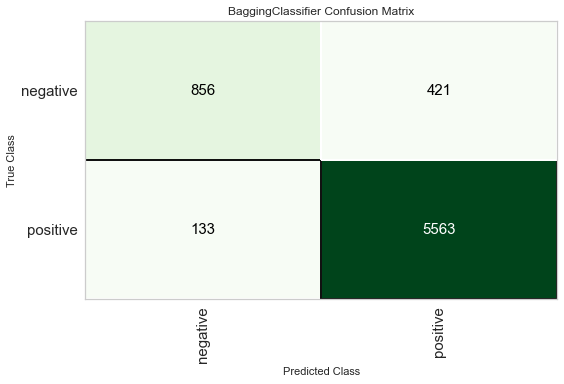

In [30]:
plot_model(best_model, plot="confusion_matrix")

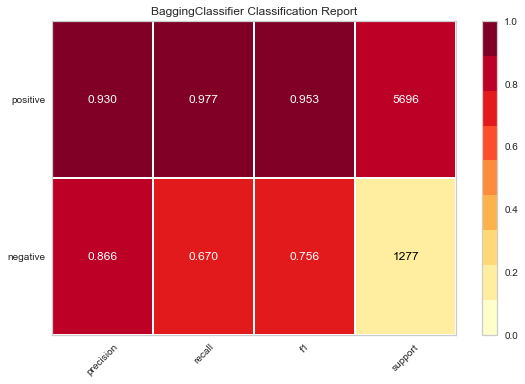

In [31]:
plot_model(best_model, plot="class_report")

In [32]:
final_model = finalize_model(best_model)
# 15 minutes for 35K rows, 4 min for 5K rows

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 

In [33]:
predict_model(final_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9568,0.9896,0.9875,0.9607,0.9739,0.8484,0.8511


In [92]:
# generates an error. Not required
final_model.predict(new_test_df)

ValueError: Number of features of the model must match the input. Model n_features is 800 and input n_features is 801.

In [34]:
predict_unseen = predict_model(final_model, data=new_test_df);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0,0.9589,0,0,0,0,0


In [35]:
new_test_df.head(5)

,10,able,about,absolutely,across,action,actually,add,adult,adventure,...,wrong,year,years,yes,yet,you,young,your,yourself,derived_ratings
13506,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
35279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
7908,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,2,0,0,0,positive
23064,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
1771,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative


In [36]:
new_test_df.drop(['derived_ratings'], axis=1, inplace=True)

In [37]:
new_test_df.head(5)

,10,able,about,absolutely,across,action,actually,add,adult,adventure,...,written,wrong,year,years,yes,yet,you,young,your,yourself
13506,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7908,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,2,0,0,0
23064,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1771,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
final_model.predict(new_test_df)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [39]:
prediction=predict_model(final_model,data=new_test_df,round=0)

In [40]:
prediction

,10,able,about,absolutely,across,action,actually,add,adult,adventure,...,year,years,yes,yet,you,young,your,yourself,Label,Score
13506,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,positive,1.0
35279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,positive,1.0
7908,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,2,0,0,0,positive,1.0
23064,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,negative,1.0
1771,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,negative,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,positive,1.0
12759,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,positive,1.0
1092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,positive,1.0
4097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,positive,1.0


In [41]:
predict_unseen

,10,able,about,absolutely,across,action,actually,add,adult,adventure,...,years,yes,yet,you,young,your,yourself,derived_ratings,Label,Score
13506,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,negative,positive,0.7859
35279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,positive,positive,0.9419
7908,0,0,0,0,0,1,0,0,0,0,...,0,0,1,2,0,0,0,positive,positive,0.9873
23064,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,negative,negative,0.7105
1771,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,negative,negative,0.6776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,positive,positive,0.9773
12759,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,positive,positive,0.9972
1092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,positive,positive,0.9947
4097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,positive,positive,0.9168


In [42]:
save_model(final_model,"deployment_04112022")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['10', 'able', 'about',
                                                           'absolutely',
                                                           'across', 'action',
                                                           'actually', 'add',
                                                           'adult', 'adventure',
                                                           'after', 'again',
                                                           'against', 'age',
                                                           'ago', 'all',
                                                           'alm

In [45]:
columns_name = list(new_train_df.columns)
columns_name

['10',
 'able',
 'about',
 'absolutely',
 'across',
 'action',
 'actually',
 'add',
 'adult',
 'adventure',
 'after',
 'again',
 'against',
 'age',
 'ago',
 'all',
 'almost',
 'alone',
 'along',
 'alpha',
 'already',
 'also',
 'although',
 'always',
 'am',
 'amazing',
 'amazon',
 'an',
 'and',
 'another',
 'any',
 'anyone',
 'anything',
 'are',
 'aren',
 'around',
 'as',
 'at',
 'attention',
 'attraction',
 'author',
 'authors',
 'away',
 'awesome',
 'baby',
 'back',
 'bad',
 'based',
 'be',
 'beautiful',
 'became',
 'because',
 'become',
 'becomes',
 'been',
 'before',
 'begin',
 'beginning',
 'begins',
 'behind',
 'being',
 'believable',
 'believe',
 'best',
 'better',
 'between',
 'beyond',
 'big',
 'bit',
 'black',
 'body',
 'book',
 'books',
 'boring',
 'both',
 'bought',
 'boy',
 'boyfriend',
 'break',
 'bring',
 'brings',
 'broken',
 'brother',
 'brothers',
 'brought',
 'building',
 'business',
 'but',
 'buy',
 'by',
 'call',
 'called',
 'came',
 'can',
 'cannot',
 'cant',
 'car

In [46]:
new_predict_df= pd.DataFrame(columns=['19th',
 '20th',
 'abagnale',
 'able',
 'about',
 'absolutely',
 'academy',
 'account',
 'action',
 'actual',
 'actually',
 'adventure',
 'after',
 'again',
 'against',
 'age',
 'ago',
 'all',
 'allison',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'amazing',
 'american',
 'amount',
 'an',
 'and',
 'anita',
 'another',
 'any',
 'anyone',
 'anything',
 'are',
 'argeneau',
 'around',
 'articles',
 'as',
 'at',
 'attention',
 'author',
 'authors',
 'available',
 'away',
 'back',
 'bad',
 'bank',
 'based',
 'battle',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'bed',
 'been',
 'before',
 'begin',
 'beginning',
 'begins',
 'behind',
 'being',
 'believe',
 'bennie',
 'best',
 'better',
 'between',
 'big',
 'birthday',
 'bit',
 'bite',
 'black',
 'bliss',
 'blood',
 'book',
 'books',
 'boring',
 'both',
 'bought',
 'bourgeoisie',
 'brennan',
 'brief',
 'bring',
 'business',
 'but',
 'buy',
 'by',
 'call',
 'came',
 'can',
 'cannot',
 'capital',
 'capitalism',
 'capitalist',
 'care',
 'carrie',
 'case',
 'catch',
 'cause',
 'century',
 'certainly',
 'chance',
 'chandler',
 'change',
 'chapter',
 'chapters',
 'character',
 'characters',
 'child',
 'children',
 'civil',
 'class',
 'classes',
 'clear',
 'clearly',
 'cm_cr_arp_d_rvw_txt',
 'collection',
 'college',
 'come',
 'comes',
 'coming',
 'communism',
 'communist',
 'compelling',
 'complete',
 'completely',
 'con',
 'concept',
 'content',
 'control',
 'copy',
 'could',
 'couldn',
 'country',
 'couple',
 'course',
 'cover',
 'created',
 'crime',
 'critique',
 'culture',
 'danger',
 'dark',
 'data',
 'daughter',
 'day',
 'days',
 'dead',
 'deal',
 'death',
 'decided',
 'definitely',
 'descriptions',
 'despite',
 'detail',
 'details',
 'detective',
 'developed',
 'development',
 'dialogue',
 'did',
 'didn',
 'diet',
 'different',
 'difficult',
 'disappointed',
 'division',
 'do',
 'does',
 'doesn',
 'doing',
 'don',
 'done',
 'down',
 'dp',
 'dr',
 'due',
 'during',
 'each',
 'earlier',
 'early',
 'easily',
 'easy',
 'economic',
 'economics',
 'edition',
 'either',
 'else',
 'emily',
 'end',
 'ending',
 'engels',
 'engine',
 'enjoy',
 'enjoyable',
 'enjoyed',
 'enough',
 'entertaining',
 'entire',
 'equal',
 'era',
 'especially',
 'essay',
 'etc',
 'etna',
 'european',
 'even',
 'events',
 'eventually',
 'ever',
 'every',
 'everyone',
 'everything',
 'evil',
 'exactly',
 'example',
 'excellent',
 'except',
 'exciting',
 'existence',
 'existing',
 'expect',
 'expected',
 'experience',
 'face',
 'fact',
 'fall',
 'family',
 'fan',
 'far',
 'fast',
 'father',
 'favorite',
 'fbi',
 'feel',
 'feeling',
 'feels',
 'felt',
 'female',
 'fett',
 'few',
 'fiction',
 'figure',
 'finally',
 'find',
 'finds',
 'finish',
 'finished',
 'fire',
 'first',
 'five',
 'follow',
 'following',
 'food',
 'for',
 'force',
 'forced',
 'forward',
 'found',
 'four',
 'frank',
 'franklin',
 'free',
 'friends',
 'from',
 'full',
 'fully',
 'fun',
 'funny',
 'further',
 'future',
 'gave',
 'general',
 'genre',
 'get',
 'gets',
 'getting',
 'give',
 'given',
 'gives',
 'giving',
 'glad',
 'glycemic',
 'go',
 'god',
 'goes',
 'going',
 'good',
 'got',
 'government',
 'great',
 'greg',
 'group',
 'guy',
 'had',
 'half',
 'hand',
 'happened',
 'happy',
 'hard',
 'has',
 'have',
 'having',
 'he',
 'help',
 'her',
 'here',
 'herself',
 'hicks',
 'high',
 'higher',
 'highly',
 'him',
 'himself',
 'his',
 'historical',
 'history',
 'hold',
 'home',
 'hook',
 'hope',
 'house',
 'how',
 'however',
 'href',
 'human',
 'husband',
 'idea',
 'ideas',
 'ie',
 'if',
 'immediately',
 'important',
 'in',
 'industrial',
 'information',
 'instead',
 'interest',
 'interested',
 'interesting',
 'into',
 'intriguing',
 'introduced',
 'introduction',
 'involved',
 'is',
 'isn',
 'issues',
 'it',
 'its',
 'itself',
 'jack',
 'jane',
 'jedi',
 'job',
 'judy',
 'julia',
 'just',
 'justice',
 'karl',
 'keep',
 'kept',
 'kill',
 'killed',
 'killing',
 'kincaid',
 'kind',
 'kindle',
 'knew',
 'know',
 'known',
 'ky',
 'labor',
 'language',
 'large',
 'last',
 'later',
 'law',
 'lead',
 'learn',
 'least',
 'leave',
 'left',
 'less',
 'let',
 'life',
 'light',
 'like',
 'liked',
 'line',
 'link',
 'linked',
 'lisa',
 'lissi',
 'lissianna',
 'list',
 'little',
 'live',
 'lives',
 'living',
 'll',
 'load',
 'local',
 'long',
 'longer',
 'look',
 'looking',
 'looks',
 'lost',
 'lot',
 'love',
 'loved',
 'low',
 'lynsay',
 'machinery',
 'machines',
 'made',
 'main',
 'major',
 'make',
 'makes',
 'making',
 'man',
 'manifesto',
 'manufactured',
 'many',
 'market',
 'marlowe',
 'marriage',
 'marx',
 'master',
 'matter',
 'may',
 'maybe',
 'mayes',
 'mcgavock',
 'me',
 'mean',
 'means',
 'men',
 'mentioned',
 'middle',
 'might',
 'military',
 'mill',
 'mind',
 'missing',
 'modern',
 'money',
 'moon',
 'more',
 'most',
 'mother',
 'movie',
 'mr',
 'ms',
 'much',
 'murder',
 'must',
 'my',
 'myself',
 'mystery',
 'name',
 'near',
 'necessary',
 'need',
 'needed',
 'needs',
 'never',
 'new',
 'news',
 'newspaper',
 'next',
 'nice',
 'nicholas',
 'night',
 'no',
 'normal',
 'not',
 'nothing',
 'novel',
 'novels',
 'now',
 'number',
 'observation',
 'obsession',
 'of',
 'off',
 'often',
 'ok',
 'old',
 'on',
 'once',
 'one',
 'ones',
 'only',
 'or',
 'order',
 'original',
 'other',
 'others',
 'otherwise',
 'our',
 'out',
 'over',
 'overall',
 'own',
 'page',
 'pages',
 'paper',
 'paranormal',
 'part',
 'particular',
 'particularly',
 'parts',
 'passion',
 'past',
 'people',
 'perfect',
 'perhaps',
 'person',
 'personal',
 'philosophy',
 'pick',
 'pigeon',
 'place',
 'places',
 'plot',
 'point',
 'political',
 'poor',
 'possible',
 'post',
 'power',
 'present',
 'presented',
 'pretty',
 'previous',
 'price',
 'prison',
 'private',
 'probably',
 'problem',
 'problems',
 'product',
 'production',
 'productive',
 'professor',
 'proletariat',
 'property',
 'published',
 'put',
 'questions',
 'quick',
 'quickly',
 'quite',
 'rate',
 'rates',
 'rather',
 'rating',
 're',
 'read',
 'reader',
 'readers',
 'reading',
 'real',
 'reality',
 'really',
 'reason',
 'reasons',
 'recommend',
 'ref',
 'relations',
 'relationship',
 'rest',
 'return',
 'review',
 'reviews',
 'revolution',
 'rich',
 'right',
 'romance',
 'romantic',
 'rosato',
 'said',
 'same',
 'sands',
 'save',
 'saved',
 'say',
 'saying',
 'says',
 'scenes',
 'scottoline',
 'second',
 'section',
 'see',
 'seem',
 'seemed',
 'seems',
 'seen',
 'self',
 'sense',
 'series',
 'set',
 'several',
 'sex',
 'she',
 'ship',
 'short',
 'should',
 'shreve',
 'side',
 'sight',
 'simple',
 'simply',
 'since',
 'sister',
 'slave',
 'slow',
 'small',
 'so',
 'social',
 'society',
 'some',
 'someone',
 'something',
 'sometimes',
 'somewhat',
 'sort',
 'source',
 'south',
 'sowell',
 'space',
 'speak',
 'spoilers',
 'stand',
 'star',
 'stars',
 'start',
 'started',
 'starts',
 'state',
 'states',
 'steam',
 'still',
 'stories',
 'story',
 'strong',
 'style',
 'subject',
 'subscription',
 'such',
 'sure',
 'suspense',
 'system',
 'take',
 'takes',
 'taking',
 'tale',
 'tassel',
 'tell',
 'tells',
 'text',
 'than',
 'thanks',
 'that',
 'the',
 'their',
 'them',
 'themselves',
 'then',
 'there',
 'these',
 'they',
 'thing',
 'things',
 'think',
 'thinking',
 'this',
 'thomas',
 'those',
 'though',
 'thought',
 'three',
 'through',
 'throughout',
 'thus',
 'tied',
 'time',
 'times',
 'to',
 'today',
 'together',
 'told',
 'tony',
 'too',
 'took',
 'trading',
 'travel',
 'trial',
 'tribe',
 'trilogy',
 'true',
 'truly',
 'try',
 'trying',
 'turn',
 'turns',
 'twist',
 'two',
 'ultimately',
 'under',
 'understand',
 'understanding',
 'unfortunately',
 'unique',
 'until',
 'up',
 'upon',
 'us',
 'use',
 'used',
 'usually',
 'utf8',
 'value',
 'vampire',
 'vampires',
 'van',
 'various',
 'vatta',
 've',
 'version',
 'very',
 'view',
 'villain',
 'volume',
 'vong',
 'wait',
 'want',
 'wanted',
 'wants',
 'war',
 'was',
 'wasn',
 'way',
 'ways',
 'we',
 'wealth',
 'weight',
 'well',
 'went',
 'were',
 'what',
 'when',
 'where',
 'whether',
 'which',
 'while',
 'who',
 'whole',
 'whose',
 'why',
 'wife',
 'will',
 'wish',
 'with',
 'within',
 'without',
 'woman',
 'women',
 'won',
 'wonderful',
 'word',
 'words',
 'work',
 'workers',
 'working',
 'works',
 'world',
 'worth',
 'would',
 'write',
 'writer',
 'writes',
 'writing',
 'written',
 'wrong',
 'wrote',
 'year',
 'years',
 'yes',
 'yet',
 'you',
 'young',
 'your',
 'derived_ratings'])

In [47]:
new_predict_df

,19th,20th,abagnale,able,about,absolutely,academy,account,action,actual,...,wrong,wrote,year,years,yes,yet,you,young,your,derived_ratings


In [48]:
model = load_model('deployment_04112022')

Transformation Pipeline and Model Successfully Loaded


In [49]:
cols = ['reviewText']
records = [['very bad lenghty very bad problem boring very bad lenghty very bad problem boring very bad lenghty very bad problem boring']]
input_df = pd.DataFrame(data=records,columns=cols)

In [50]:
tf_vectorizer = CountVectorizer()
features = tf_vectorizer.fit_transform(input_df['reviewText'].apply(lambda features : np.str_(features)))
features_df = pd.DataFrame(features.toarray(), columns=tf_vectorizer.get_feature_names())

In [51]:
features_df

,bad,boring,lenghty,problem,very
0,6,3,3,3,6


In [52]:
dummy = new_predict_df.head(1)
dummy[dummy > 0] = 0
dummy

,19th,20th,abagnale,able,about,absolutely,academy,account,action,actual,...,wrong,wrote,year,years,yes,yet,you,young,your,derived_ratings


In [53]:
for col in dummy:
    try:
        dummy[col] = features_df[col]
    except:
        pass


In [54]:
dummy.head(1)


,19th,20th,abagnale,able,about,absolutely,academy,account,action,actual,...,wrong,wrote,year,years,yes,yet,you,young,your,derived_ratings
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
predict_df = dummy.fillna(0)

In [56]:
predict_df

,19th,20th,abagnale,able,about,absolutely,academy,account,action,actual,...,wrong,wrote,year,years,yes,yet,you,young,your,derived_ratings
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
pd.set_option('display.max_columns', 805)

In [58]:
predict_df

,19th,20th,abagnale,able,about,absolutely,academy,account,action,actual,actually,adventure,after,again,against,age,ago,all,allison,almost,alone,along,already,also,although,always,am,amazing,american,amount,an,and,anita,another,any,anyone,anything,are,argeneau,around,articles,as,at,attention,author,authors,available,away,back,bad,bank,based,battle,be,became,because,become,becomes,bed,been,before,begin,beginning,begins,behind,being,believe,bennie,best,better,between,big,birthday,bit,bite,black,bliss,blood,book,books,boring,both,bought,bourgeoisie,brennan,brief,bring,business,but,buy,by,call,came,can,cannot,capital,capitalism,capitalist,care,carrie,case,catch,cause,century,certainly,chance,chandler,change,chapter,chapters,character,characters,child,children,civil,class,classes,clear,clearly,cm_cr_arp_d_rvw_txt,collection,college,come,comes,coming,communism,communist,compelling,complete,completely,con,concept,content,control,copy,could,couldn,country,couple,course,cover,created,crime,critique,culture,danger,dark,data,daughter,day,days,dead,deal,death,decided,definitely,descriptions,despite,detail,details,detective,developed,development,dialogue,did,didn,diet,different,difficult,disappointed,division,do,does,doesn,doing,don,done,down,dp,dr,due,during,each,earlier,early,easily,easy,economic,economics,edition,either,else,emily,end,ending,engels,engine,enjoy,enjoyable,enjoyed,enough,entertaining,entire,equal,era,especially,essay,etc,etna,european,even,events,eventually,ever,every,everyone,everything,evil,exactly,example,excellent,except,exciting,existence,existing,expect,expected,experience,face,fact,fall,family,fan,far,fast,father,favorite,fbi,feel,feeling,feels,felt,female,fett,few,fiction,figure,finally,find,finds,finish,finished,fire,first,five,follow,following,food,for,force,forced,forward,found,four,frank,franklin,free,friends,from,full,fully,fun,funny,further,future,gave,general,genre,get,gets,getting,give,given,gives,giving,glad,glycemic,go,god,goes,going,good,got,government,great,greg,group,guy,had,half,hand,happened,happy,hard,has,have,having,he,help,her,here,herself,hicks,high,higher,highly,him,himself,his,historical,history,hold,home,hook,hope,house,how,however,href,human,husband,idea,ideas,ie,if,immediately,important,in,industrial,information,instead,interest,interested,interesting,into,intriguing,introduced,introduction,involved,is,isn,issues,it,its,itself,jack,jane,jedi,job,judy,julia,just,justice,karl,keep,kept,kill,killed,killing,kincaid,kind,kindle,knew,know,known,ky,labor,language,large,last,later,law,lead,learn,least,leave,left,less,let,life,light,like,liked,line,link,linked,lisa,lissi,lissianna,list,little,live,lives,living,ll,load,local,long,longer,look,looking,looks,lost,lot,love,loved,low,lynsay,machinery,machines,made,main,major,make,makes,making,man,manifesto,manufactured,many,market,marlowe,marriage,marx,master,matter,may,maybe,mayes,mcgavock,me,mean,means,men,mentioned,middle,might,military,mill,mind,missing,modern,money,moon,more,most,mother,movie,mr,ms,much,murder,must,my,myself,mystery,name,near,necessary,need,needed,needs,never,new,news,newspaper,next,nice,nicholas,night,no,normal,not,nothing,novel,novels,now,number,observation,obsession,of,off,often,ok,old,on,once,one,ones,only,or,order,original,other,others,otherwise,our,out,over,overall,own,page,pages,paper,paranormal,part,particular,particularly,parts,passion,past,people,perfect,perhaps,person,personal,philosophy,pick,pigeon,place,places,plot,point,political,poor,possible,post,power,present,presented,pretty,previous,price,prison,private,probably,problem,problems,product,production,productive,professor,proletariat,property,published,put,questions,quick,quickly,quite,rate,rates,rather,rating,re,read,reader,readers,reading,real,reality,really,reason,reasons,recommend,ref,relations,relationship,rest,return,review,reviews,revolution,rich,right,romance,romantic,rosato,said,same,sands,save,saved,say,saying,says,scenes,scottoline,second,section,see,seem,see

In [59]:
prediction =predict_model(model,data=predict_df,round=0)

KeyError: "['10', 'across', 'add', 'adult', 'alpha', 'amazon', 'aren', 'attraction', 'awesome', 'baby', 'beautiful', 'believable', 'beyond', 'body', 'boy', 'boyfriend', 'break', 'brings', 'broken', 'brother', 'brothers', 'brought', 'building', 'called', 'cant', 'caught', 'changed', 'check', 'chemistry', 'clean', 'cliffhanger', 'close', 'complex', 'connection', 'continue', 'continues', 'crazy', 'cute', 'darcy', 'de', 'deep', 'depth', 'description', 'doesnt', 'drama', 'drawn', 'earth', 'editing', 'elizabeth', 'emotional', 'emotions', 'ended', 'ends', 'errors', 'ex', 'exchange', 'extremely', 'eyes', 'fantastic', 'fantasy', 'feelings', 'fell', 'fight', 'filled', 'finding', 'fine', 'friend', 'girl', 'girls', 'grow', 'guess', 'guys', 'happen', 'happens', 'hate', 'haven', 'hea', 'head', 'heart', 'hell', 'hero', 'heroine', 'honest', 'honestly', 'hooked', 'hoping', 'hot', 'huge', 'humor', 'hurt', 'im', 'including', 'installment', 'journey', 'keeps', 'kids', 'king', 'knowing', 'knows', 'lack', 'lady', 'laugh', 'learned', 'leaves', 'level', 'london', 'lots', 'loves', 'loving', 'magic', 'male', 'married', 'marry', 'mate', 'mc', 'meet', 'meeting', 'meets', 'met', 'miss', 'moment', 'moments', 'months', 'move', 'novella', 'oh', 'okay', 'older', 'open', 'opinion', 'paced', 'pain', 'parents', 'plan', 'play', 'please', 'plus', 'potential', 'pov', 'predictable', 'premise', 'protect', 'reads', 'ready', 'realistic', 'realize', 'received', 'recipes', 'recommended', 'relationships', 'remember', 'ride', 'run', 'running', 'sad', 'sam', 'saw', 'scene', 'school', 'science', 'secret', 'secrets', 'seeing', 'sees', 'seriously', 'setting', 'sexual', 'sexy', 'show', 'shows', 'single', 'situation', 'situations', 'smart', 'son', 'soon', 'sorry', 'special', 'spent', 'stay', 'steamy', 'step', 'stop', 'storyline', 'stuff', 'super', 'supposed', 'surprise', 'surprised', 'sweet', 'taken', 'talk', 'talking', 'team', 'telling', 'thank', 'thinks', 'third', 'thoroughly', 'thoughts', 'title', 'top', 'totally', 'town', 'tried', 'tries', 'trouble', 'trust', 'truth', 'turned', 'twists', 'type', 'using', 'violence', 'waiting', 'wanting', 'wedding', 'worked', 'wouldn', 'wow', 'yourself'] not in index"

In [ ]:
prediction

In [84]:
p1=model.predict(predict_df)

In [85]:
p1[0]

0

In [86]:
type(p1[0])

numpy.int64

In [87]:
prediction = prediction.Label[0]

In [88]:
prediction

'negative'

In [178]:
get_config('seed')

6843